In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('census_income.csv')

In [3]:
# Dataset available for analysis
dt

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (32560, 15)


In [5]:
# Dataframe columns
dt.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Age has [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] unique elements
****************************************************************************************************
This column Workclass has [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] unique elements
****************************************************************************************************
This column Fnlwgt has [ 83311 215646 234721 ...  34066  84661 257302] unique elements
****************************************************************************************************
This column Education has [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' '

In [7]:
# Seeing for the null values in the dataset
dt.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

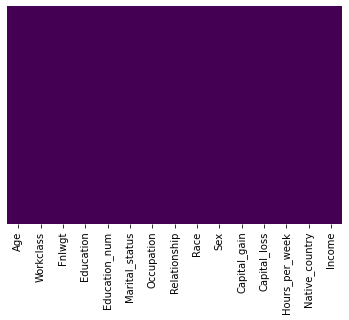

In [8]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [9]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
dt.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# To find the correlection in the dataset
dt.corr().T

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

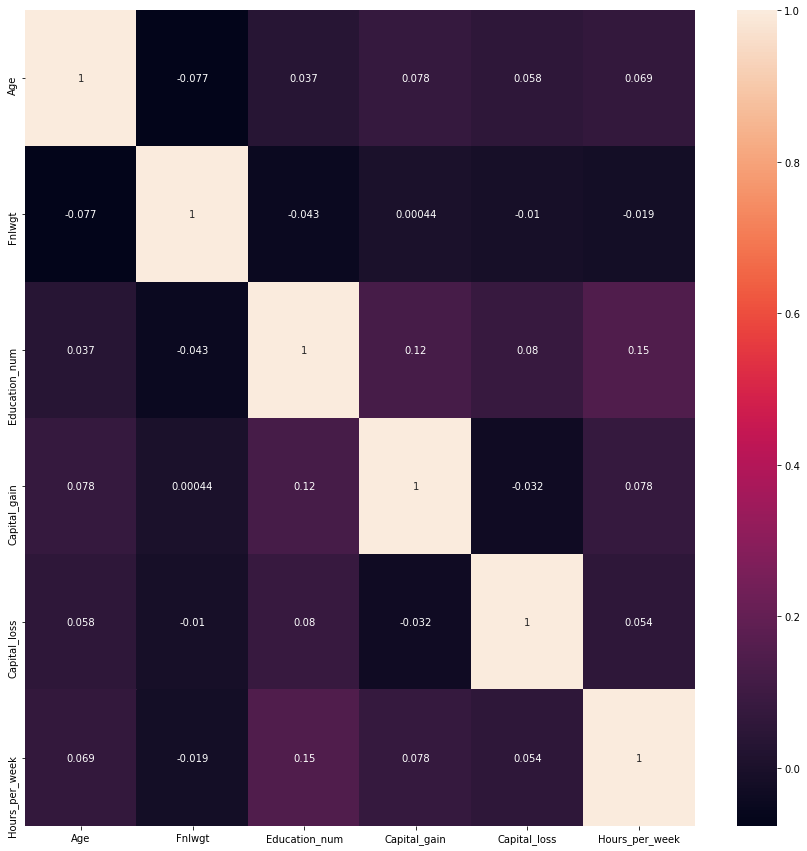

In [12]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

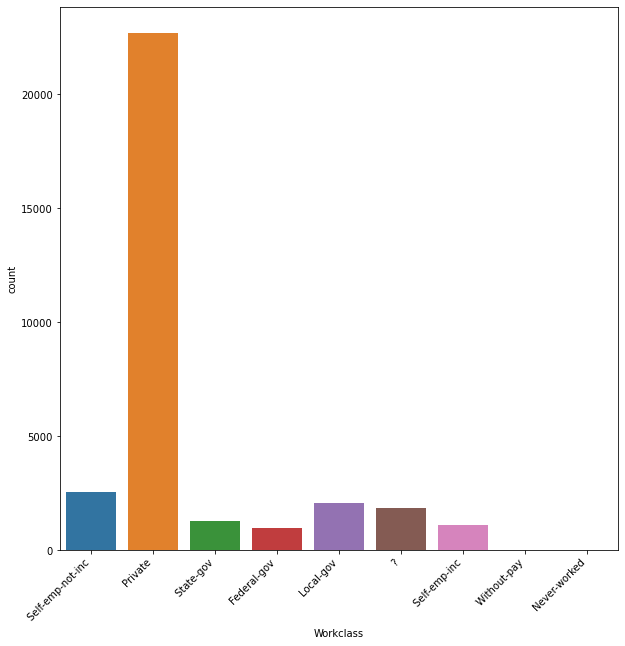

In [13]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Workclass'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

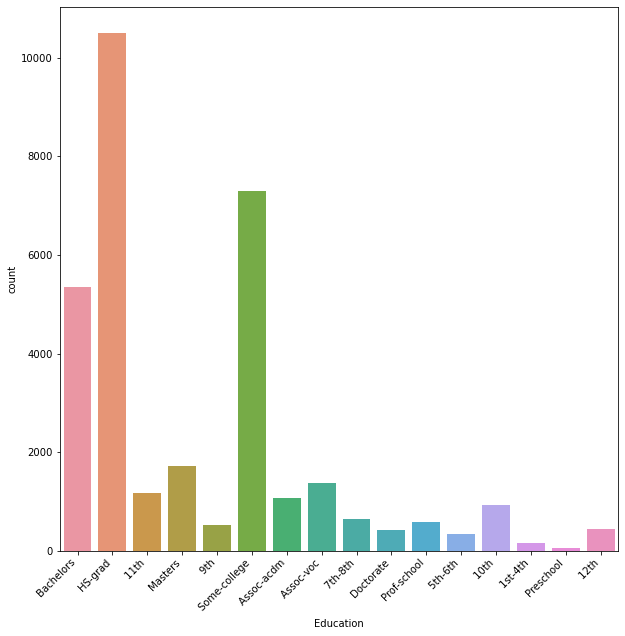

In [14]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Education'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

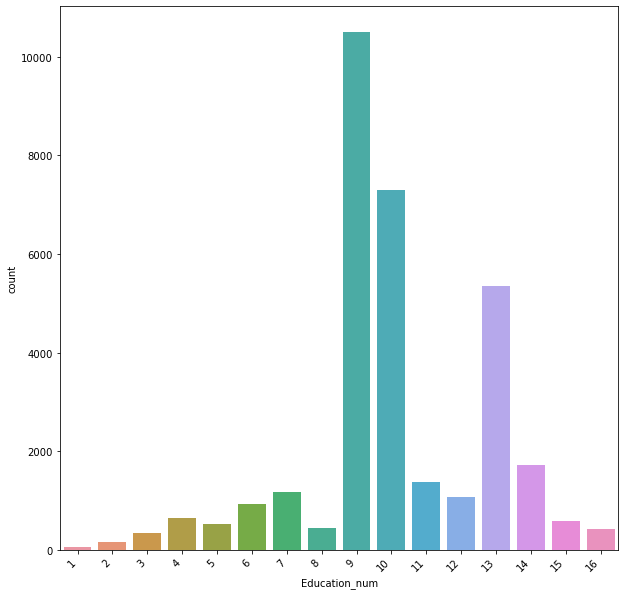

In [15]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Education_num'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

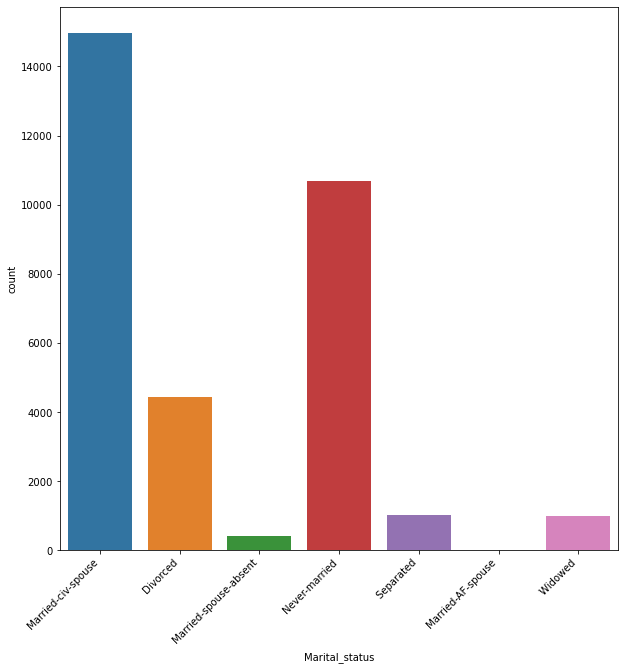

In [16]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Marital_status'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

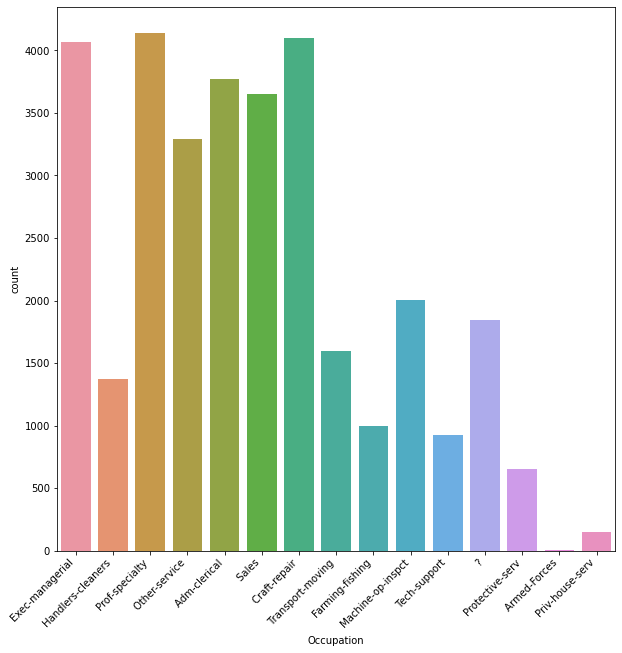

In [17]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Occupation'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

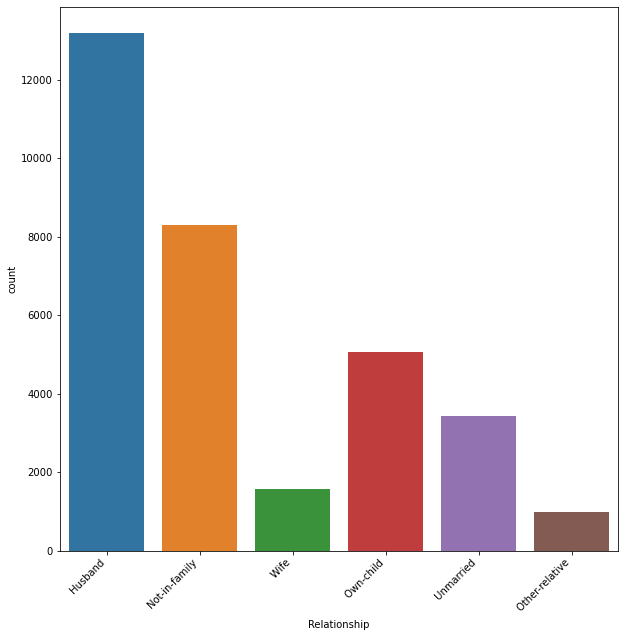

In [18]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Relationship'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

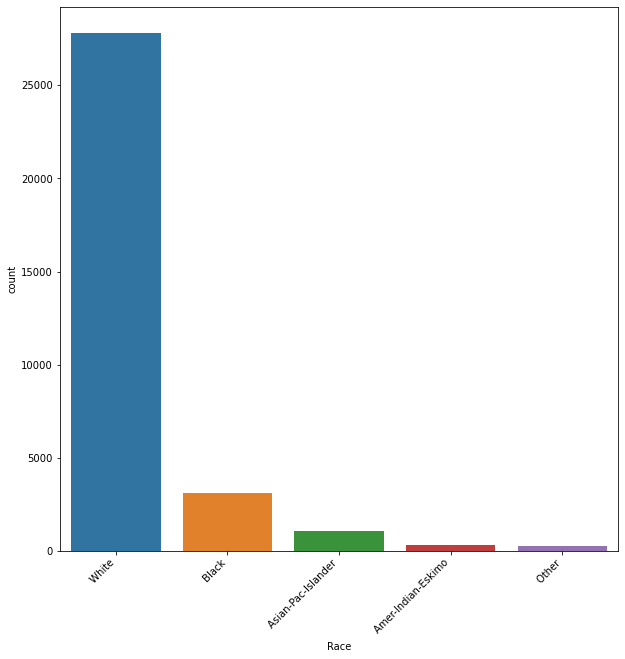

In [19]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Race'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

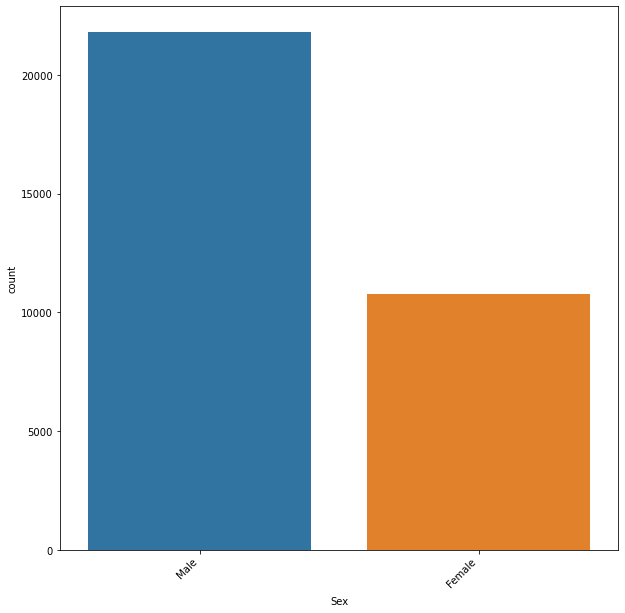

In [20]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Sex'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
Male counts are more in data

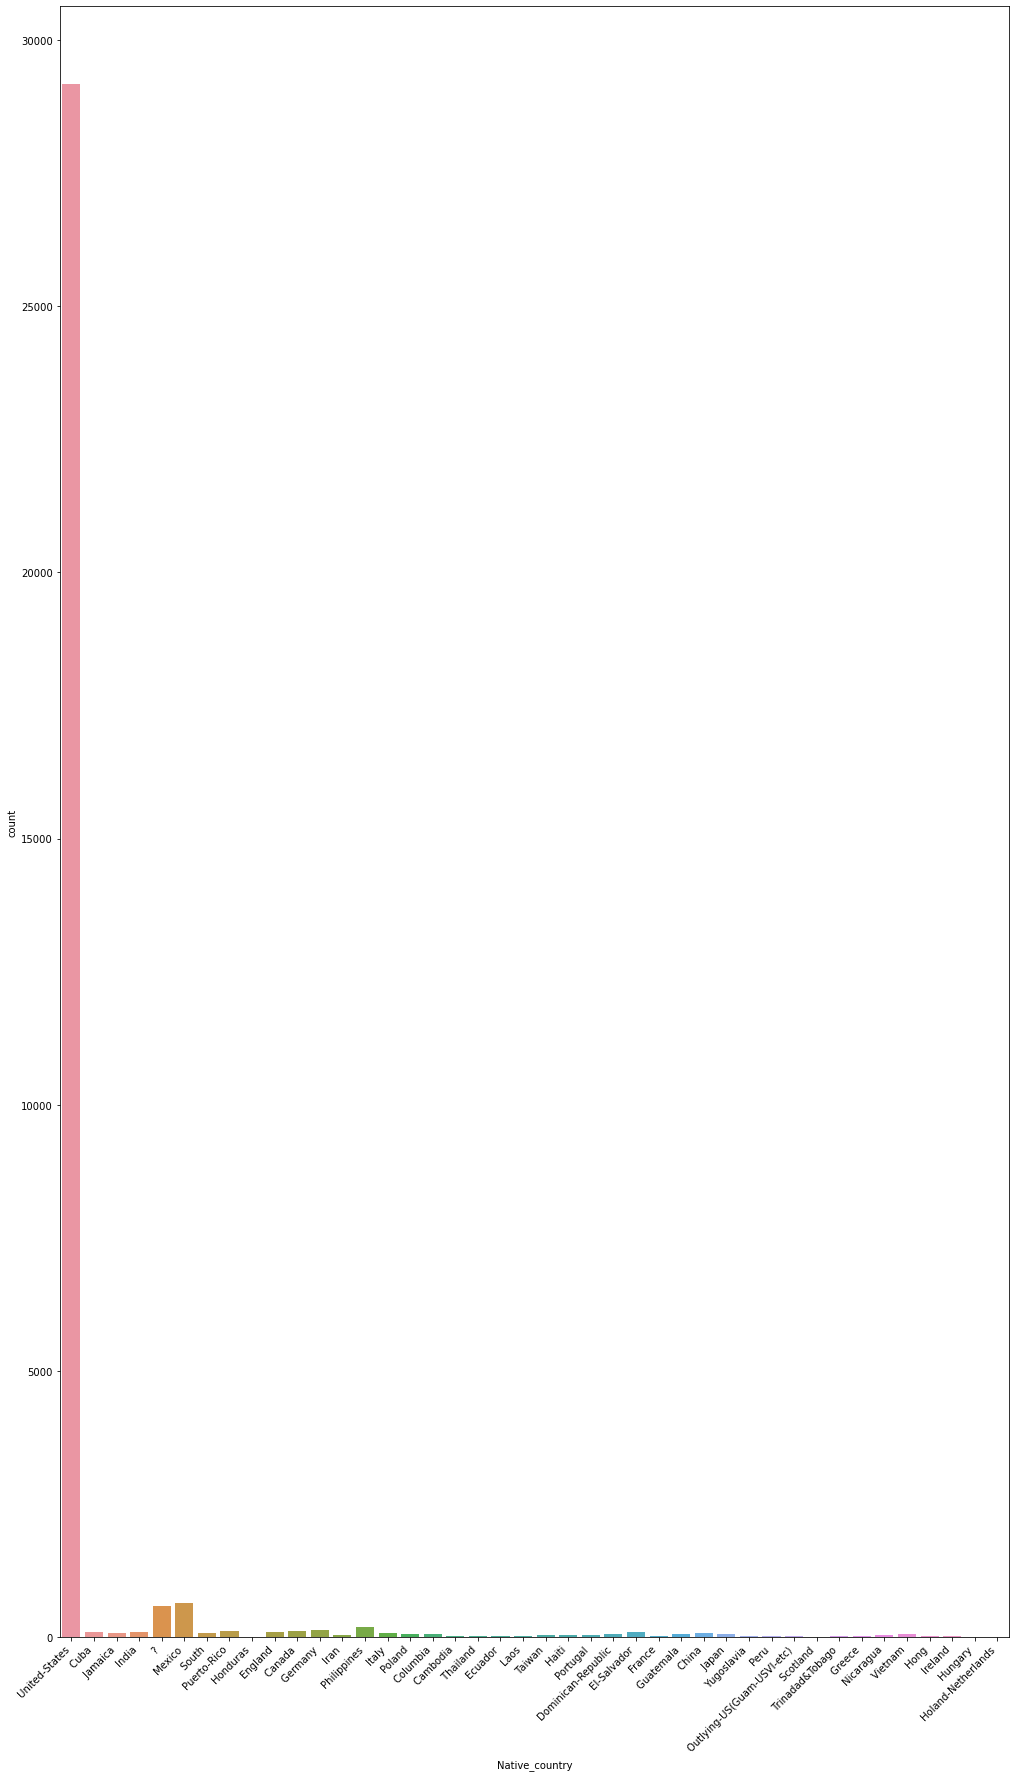

In [21]:
plt.subplots(figsize=(17,30))
chart =sns.countplot(dt['Native_country'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

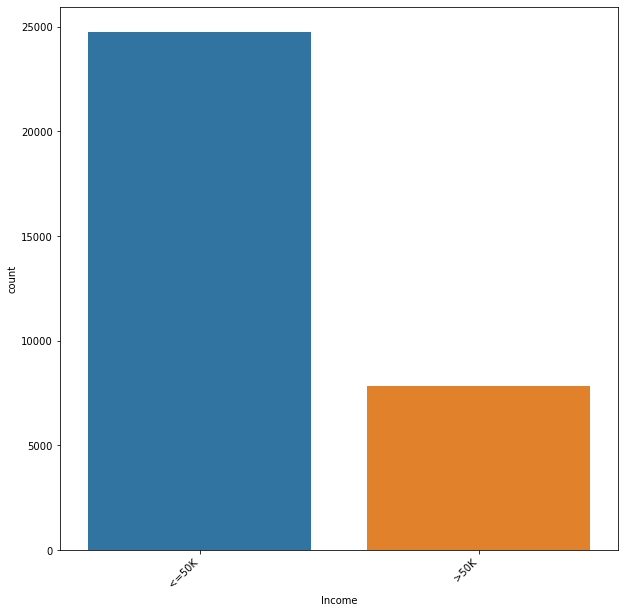

In [22]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Income'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

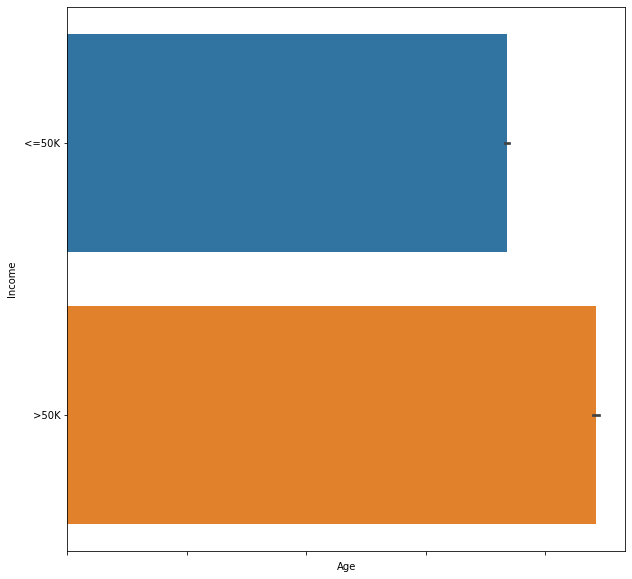

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [23]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Age', y='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

In [24]:
dt.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [25]:
#plt.subplots(figsize=(10,10))
#chart =sns.barplot(x='Workclass', y='Income', data=dt)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
#plt.show()
#sns.countplot

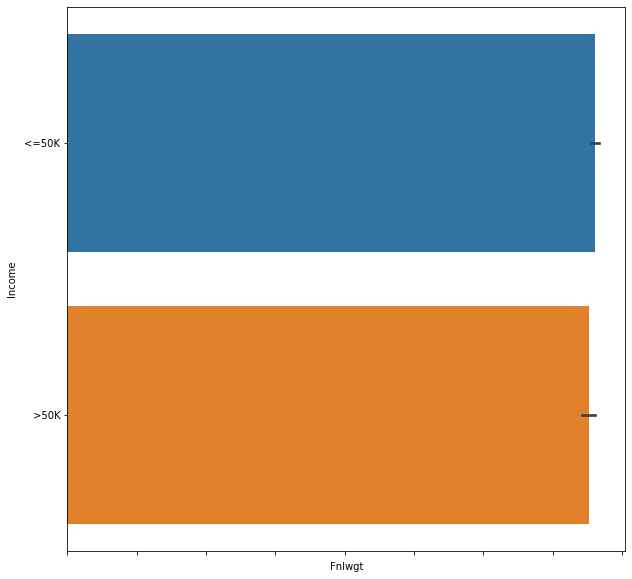

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Fnlwgt', y='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

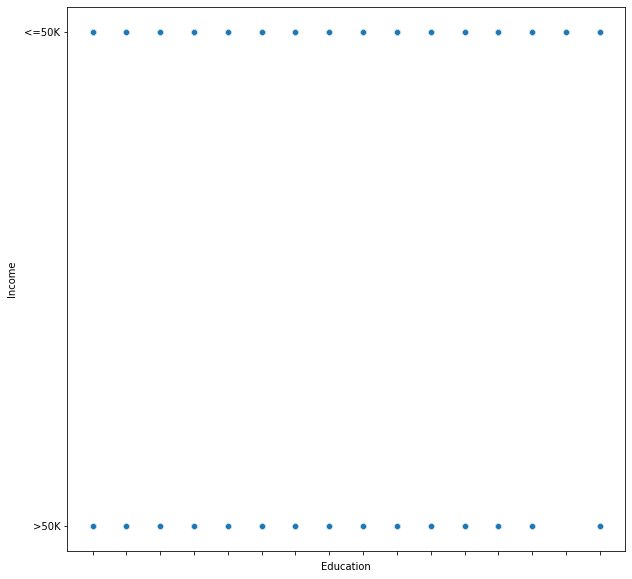

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Education', y='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

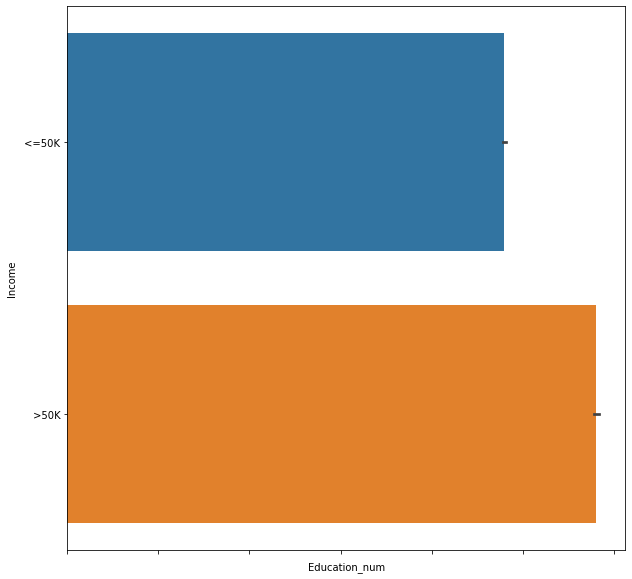

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [28]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Education_num', y='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

In [29]:
#plt.subplots(figsize=(10,10))
#chart =sns.barplot(dt['Marital_status'])
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
#plt.show()
#sns.countplot

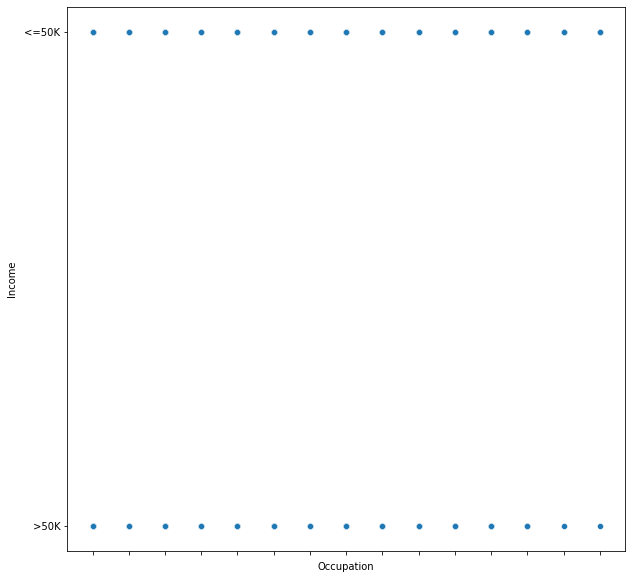

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [30]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Occupation', y='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

In [31]:
#plt.subplots(figsize=(10,10))
#chart =sns.barplot(x='Relationship', y='Income', data=dt)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
#plt.show()
#sns.countplot

In [32]:
#plt.subplots(figsize=(10,10))
#chart =sns.barplot(x='Race', y='Income', data=dt)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
#plt.show()
#sns.countplot

In [33]:
#plt.subplots(figsize=(10,10))
#chart =sns.barplot(x='Sex', y='Income', data=dt)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
#plt.show()
#sns.countplot

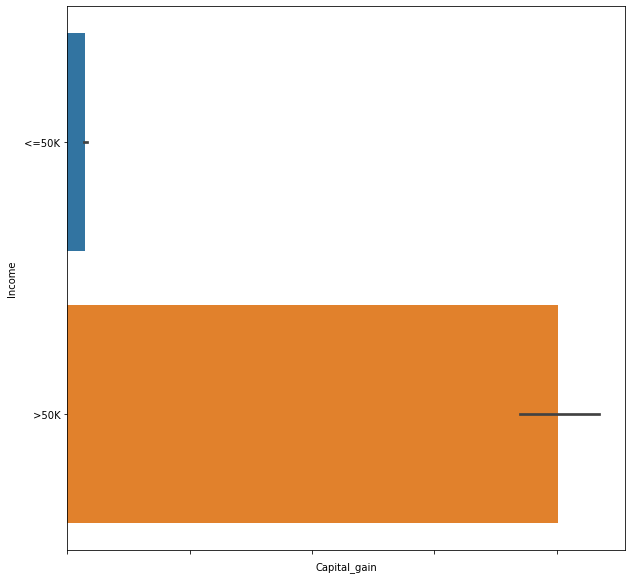

In [34]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Capital_gain', y='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

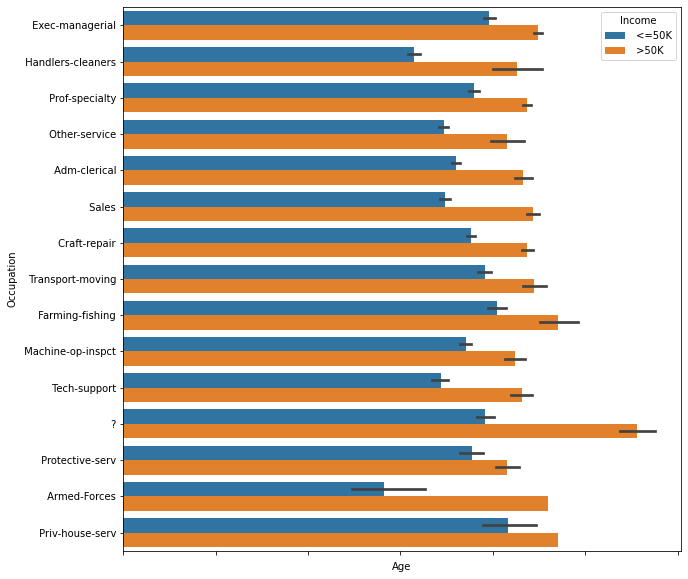

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [35]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Age', y='Occupation', hue='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

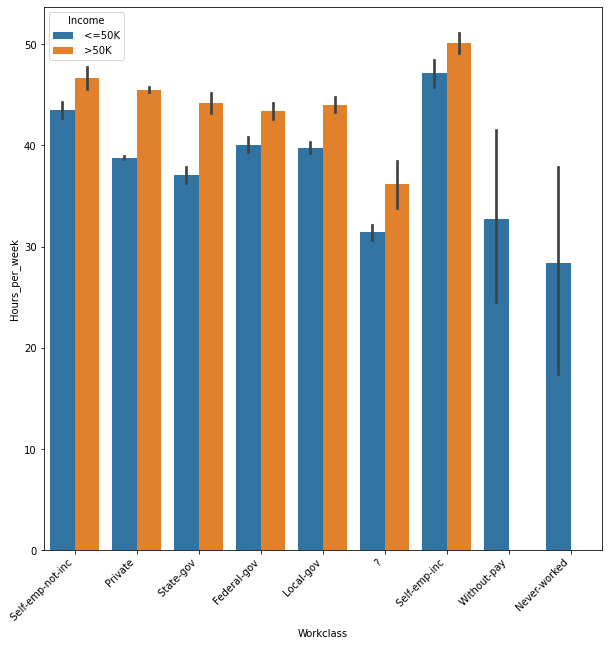

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [36]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Workclass', y='Hours_per_week', hue='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
sns.countplot

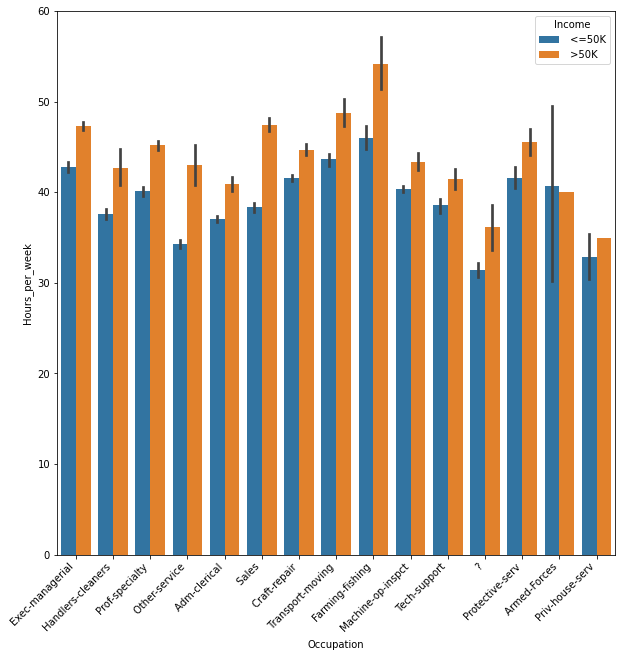

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [37]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Occupation', y='Hours_per_week', hue='Income', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
sns.countplot

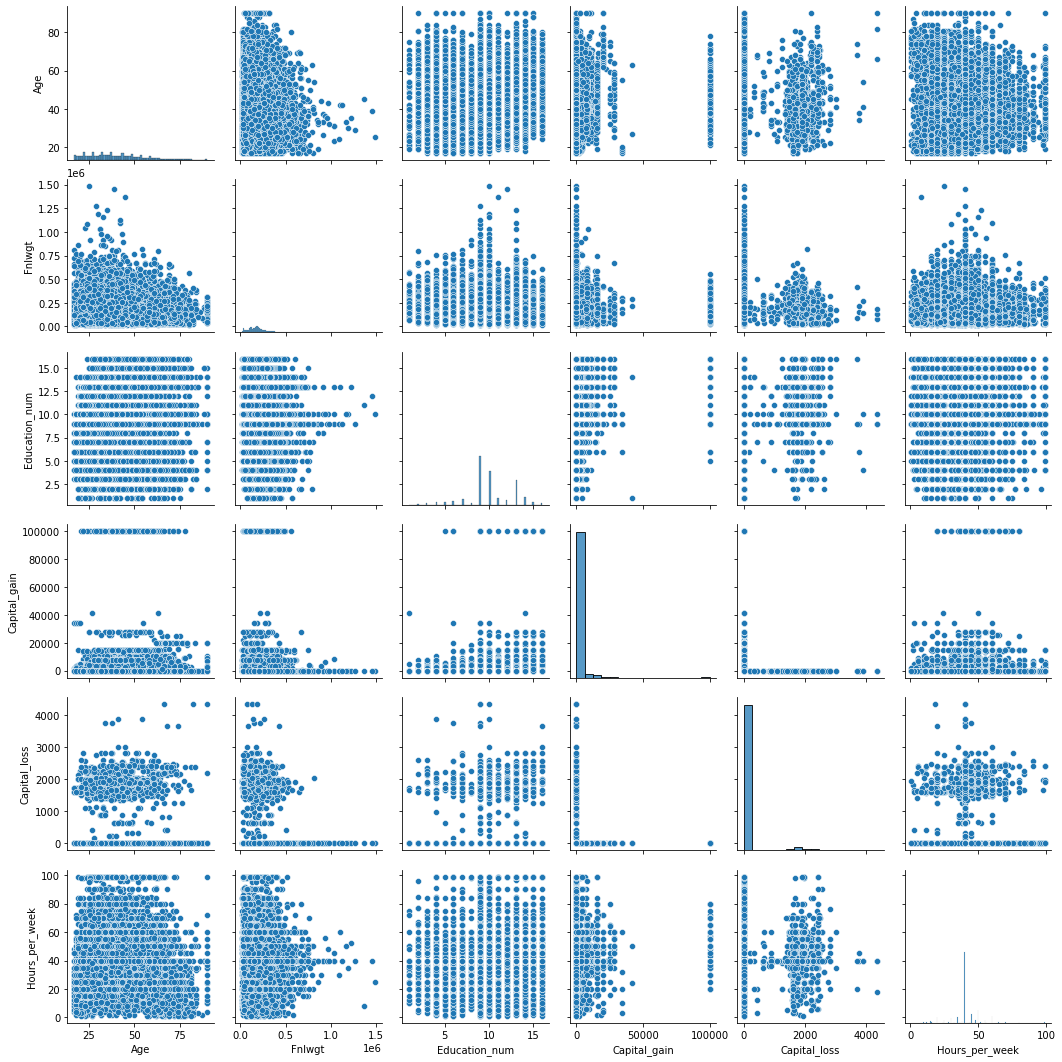

In [38]:
sns.pairplot(dt)

In [7]:
dt['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
dt['Workclass'].replace(' ?',' Private',inplace=True)

In [9]:
dt['Occupation'].mode()[0]

' Prof-specialty'

In [10]:
dt['Occupation'].replace(' ?',' Prof-specialty',inplace=True)

<AxesSubplot:ylabel='Density'>

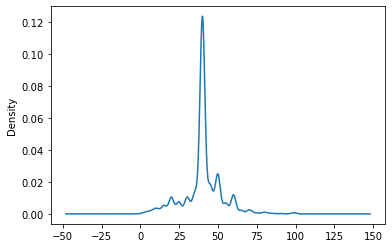

In [11]:
dt['Hours_per_week'].plot(kind='kde')

<AxesSubplot:>

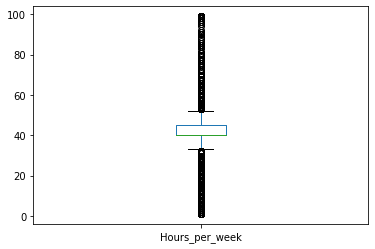

In [12]:
dt['Hours_per_week'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

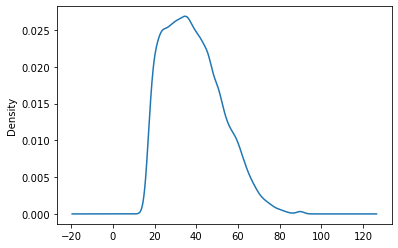

In [13]:
dt['Age'].plot(kind='kde')

<AxesSubplot:>

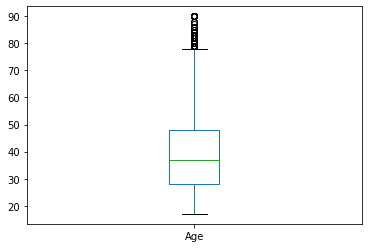

In [14]:
dt['Age'].plot(kind='box')

In [15]:
dt['Age'].median()

37.0

In [16]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [17]:
# Assigning to a variable
le=LabelEncoder()

In [18]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['Income']=le.fit_transform(dt['Income'])
dt['Sex']=le.fit_transform(dt['Sex'])
dt['Race']=le.fit_transform(dt['Race'])

In [19]:
dt

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,4,0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


In [20]:
df=pd.get_dummies(dt, columns=['Workclass','Education','Marital_status','Occupation','Relationship','Native_country'], drop_first=True)

In [21]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)

In [22]:
df

,Age,Fnlwgt,Education_num,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,4,1,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,4,1,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,2,1,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,2,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,4,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,4,0,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,4,1,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [25]:
osmp=SMOTE(0.75)

In [26]:
# Assignment of X and y
X=df.drop(['Income'], axis=1)
y=df.Income

In [27]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [28]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y)

In [29]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [30]:
# Importing PCA components
from sklearn.decomposition import PCA

In [31]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[ 1.53102276e+00, -9.89822073e-01, -5.41273582e-01, ...,
        -9.63498572e-03,  2.66476797e-15, -1.19548605e-15],
       [ 1.51926844e+00,  2.63953014e-01, -1.94942634e-01, ...,
        -7.73617799e-03,  1.59889104e-15, -7.97727920e-15],
       [-2.81326222e+00,  1.91719214e+00, -1.59684187e+00, ...,
        -2.28674085e-02,  1.35616277e-16, -1.72875724e-14],
       ...,
       [ 2.38296877e+00,  1.95354933e-01, -5.49970060e-01, ...,
        -5.66184007e-03,  2.73429302e-15, -7.53123045e-16],
       [ 2.23980972e-01, -3.95465468e-01,  7.27655262e-02, ...,
         1.11791846e-02,  2.88731318e-15,  2.20489427e-16],
       [ 1.17450047e+00, -5.97506592e-01, -8.34807119e-01, ...,
        -9.25006571e-03,  2.81589871e-15, -2.33895256e-16]])

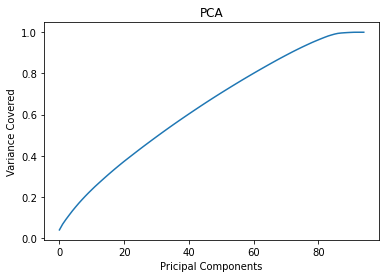

In [32]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [33]:
pca=PCA(n_components=84)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                           'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                           'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                          'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                          'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                          'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
                                          'PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70',
                                          'PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80',
                                          'PC81','PC82','PC83','PC84'])

In [34]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84
0,1.531023,-0.989822,-0.541274,-0.200671,-1.005245,-1.177497,0.208598,0.202370,-0.160630,-0.803365,0.788264,-1.461987,1.352147,0.184727,-0.275195,0.466700,-0.676796,-1.276644,-0.128909,1.026820,-0.452179,-0.059626,0.090868,0.067870,-0.631185,-0.585453,0.020243,0.599028,0.371037,0.154885,-0.684385,0.297949,-0.407718,0.052813,-0.932524,-0.129109,0.271652,-0.700822,0.334296,-0.334757,0.058519,-0.117299,-0.157892,-0.076425,0.521120,-0.546366,-0.654749,0.788024,0.266861,-0.712004,-1.202769,-0.471652,0.507675,0.777415,-0.439062,0.535181,-0.157473,0.354873,1.232032,0.360913,0.345776,-1.052928,-0.238803,-1.002420,1.422943,-1.025170,0.755660,0.880016,2.014918,-0.044654,0.734918,-0.801843,-0.199182,-0.051492,-1.011603,0.825200,-1.836965,0.829496,-0.234457,-1.352756,0.104099,0.560637,0.172888,-0.695665
1,1.519268,0.263953,-0.194943,-0.427974,-0.834833,0.757344,2.096321,-0.432651,-1.168222,-1.349799,-0.368335,0.151454,-1.952279,1.147625,-0.211799,0.565066,0.487997,-0.319924,0.985471,-2.721048,-1.644879,1.668079,0.730793,0.232106,-1.151383,-0.145191,-0.769072,-1.147236,-1.469711,2.008650,1.441108,1.121294,0.263529,-1.326796,-0.621126,0.509286,-0.334352,-0.055737,0.413432,0.294224,1.202600,0.111732,0.065804,-0.145081,0.270640,-0.223310,-0.227907,0.230209,-0.012184,-0.249352,-0.827851,-0.466936,0.092998,0.180039,-0.231224,0.266482,-0.230444,0.853944,0.565181,0.137821,-0.356496,0.147677,0.503039,-0.120461,0.054751,-0.210445,0.212968,0.115780,0.548998,0.140538,-0.604046,0.297114,-0.306007,0.287780,-0.102958,0.172382,0.013860,-0.103366,0.169431,1.141664,-0.405715,-0.449021,-0.233101,0.649901
2,-2.813262,1.917192,-1.596842,0.521538,-0.504212,-0.246085,-0.039046,-1.314849,1.689718,-0.656354,-1.393445,0.485657,-0.274253,-1.156395,-0.022788,0.781894,1.151768,-0.790803,0.666848,0.150731,0.708131,0.111974,-0.411650,-0.039058,-0.170841,0.050124,-0.189799,-0.119948,0.430555,0.033960,0.097436,-0.133501,0.020535,0.295393,-0.283907,-0.332252,0.086559,0.078313,-0.365264,0.079681,-0.088422,-0.132112,-0.567328,0.291422,0.026384,0.262376,0.000035,0.192151,0.070678,-0.227160,0.256192,0.286798,0.076298,-0.183724,-0.380086,-0.057880,0.140222,0.107361,-0.215538,-0.030245,0.248584,0.524928,0.498572,0.081057,-0.038293,0.085121,-0.640978,-0.024704,-0.609732,0.161529,0.040721,0.158810,0.068007,-0.178764,0.752719,-0.631354,-0.325239,0.708195,0.179365,-0.361097,0.004878,-0.020690,-0.091223,-0.053010
3,-0.140233,-1.708572,-0.638880,0.326165,-0.907924,-0.494448,1.339392,-0.869506,0.162742,0.611574,-0.170040,-0.258927,-1.286990,-0.809893,0.078546,0.595691,-0.694247,0.466588,-0.151381,0.019109,0.657756,1.078744,-0.542846,0.651790,0.588766,0.343357,-0.553516,-0.542918,0.079397,-1.549431,-0.876010,0.323052,0.106161,0.154172,1.084023,1.556134,-0.219918,0.101892,-0.390107,0.226561,0.246046,0.191326,0.828916,-1.016911,0.207359,-0.273515,-0.372579,-0.041463,0.170289,0.763356,0.025578,-0.706821,1.084346,-0.084895,1.103943,0.422525,0.572524,0.447004,-0.589545,-0.076720,-0.549255,-0.663700,0.185688,-0.349181,0.362548,0.232661,0.023888,-0.123514,0.853340,-0.219780,0.742631,-0.789829,0.388610,0.208293,-0.862149,0.667320,-0.241279,-0.338350,-0.347162,-0.028600,-0.485144,0.196273,-0.658647,-0.474651
4,-0.190720,-2.451198,-0.585968,0.210547,-0.313970,0.804893,0.926590,0.328974,-0.604454,0.374242,0.665777,0.487143,0.650997,-0.259332,0.307882,0.042767,0.102994,0.505800,-0.423144,-0.359495,0.405314,-0.400294,0.385353,0.685341,0.551628,1.014398,-0.659593,-0.419191,-0.445391,-0.347146,0.315815,-0.239325,0.149007,-0.024463,0.150466,0.195588,0.047703,0.149327,0.084108,-0.040953,-0.579002,-

In [35]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [68]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,600):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8208039275851489 random_state 1
accuracy of the optimum model 0.8208039275851489 random_state 1
accuracy of the model 0.8220312979441546 random_state 2
accuracy of the optimum model 0.8220312979441546 random_state 2
accuracy of the model 0.8206505062902731 random_state 3
accuracy of the model 0.8178889229825099 random_state 4
accuracy of the model 0.8232586683031605 random_state 5
accuracy of the optimum model 0.8232586683031605 random_state 5
accuracy of the model 0.823565510892912 random_state 6
accuracy of the optimum model 0.823565510892912 random_state 6
accuracy of the model 0.8327707885854556 random_state 7
accuracy of the optimum model 0.8327707885854556 random_state 7
accuracy of the model 0.823565510892912 random_state 8
accuracy of the model 0.8149739183798711 random_state 9
accuracy of the model 0.8293955200981896 random_state 10
accuracy of the model 0.8260202516109236 random_state 11
accuracy of the model 0.8223381405339061 random_state 12
accuracy

In [69]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8361460570727217 in random state 238


In [70]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,500):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8284749923289353 random_state 1
accuracy of the optimum model 0.8284749923289353 random_state 1
accuracy of the model 0.8344584228290887 random_state 2
accuracy of the optimum model 0.8344584228290887 random_state 2
accuracy of the model 0.8313899969315741 random_state 3
accuracy of the model 0.8289352562135625 random_state 4
accuracy of the model 0.8284749923289353 random_state 5
accuracy of the model 0.8344584228290887 random_state 6
accuracy of the model 0.835992635777846 random_state 7
accuracy of the optimum model 0.835992635777846 random_state 7
accuracy of the model 0.8307763117520712 random_state 8
accuracy of the model 0.8255599877262965 random_state 9
accuracy of the model 0.8310831543418227 random_state 10
accuracy of the model 0.8313899969315741 random_state 11
accuracy of the model 0.8261736729057994 random_state 12
accuracy of the model 0.8278613071494323 random_state 13
accuracy of the model 0.8289352562135625 random_state 14
accuracy of the model

In [71]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8462718625345198 in random state 178


In [73]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8128260202516109 random_state 1
accuracy of the optimum model 0.8128260202516109 random_state 1
accuracy of the model 0.8135931267259896 random_state 2
accuracy of the optimum model 0.8135931267259896 random_state 2
accuracy of the model 0.8183491868671372 random_state 3
accuracy of the optimum model 0.8183491868671372 random_state 3
accuracy of the model 0.8166615526235042 random_state 4
accuracy of the model 0.8105247008284749 random_state 5
accuracy of the model 0.8125191776618594 random_state 6
accuracy of the model 0.817275237803007 random_state 7
accuracy of the model 0.8160478674440013 random_state 8
accuracy of the model 0.8112918073028537 random_state 9
accuracy of the model 0.8096041730592206 random_state 10
accuracy of the model 0.8188094507517644 random_state 11
accuracy of the optimum model 0.8188094507517644 random_state 11
accuracy of the model 0.8089904878797177 random_state 12
accuracy of the model 0.8080699601104633 random_state 13
accuracy of 

In [74]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8278613071494323 in random state 20


In [75]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[09:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8175820803927585 random_state 1
accuracy of the optimum model 0.8175820803927585 random_state 1
[09:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8174286590978828 random_state 2
[09:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

KeyboardInterrupt: 

In [76]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8301626265725682 in random state 80


In [77]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8128260202516109 random_state 1
accuracy of the optimum model 0.8128260202516109 random_state 1
accuracy of the model 0.812212335072108 random_state 2
accuracy of the model 0.8174286590978828 random_state 3
accuracy of the optimum model 0.8174286590978828 random_state 3
accuracy of the model 0.8134397054311139 random_state 4
accuracy of the model 0.8091439091745934 random_state 5
accuracy of the model 0.8186560294568886 random_state 6
accuracy of the optimum model 0.8186560294568886 random_state 6
accuracy of the model 0.8191162933415158 random_state 7
accuracy of the optimum model 0.8191162933415158 random_state 7
accuracy of the model 0.8226449831236575 random_state 8
accuracy of the optimum model 0.8226449831236575 random_state 8
accuracy of the model 0.8120589137772323 random_state 9
accuracy of the model 0.8175820803927585 random_state 10
accuracy of the model 0.8188094507517644 random_state 11
accuracy of the model 0.8143602332003682 random_state 12
accura

KeyboardInterrupt: 

In [78]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8250997238416692 in random state 79


In [79]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8278613071494323 random_state 1
accuracy of the optimum model 0.8278613071494323 random_state 1
accuracy of the model 0.8267873580853022 random_state 2
accuracy of the model 0.8283215710340596 random_state 3
accuracy of the optimum model 0.8283215710340596 random_state 3
accuracy of the model 0.828628413623811 random_state 4
accuracy of the optimum model 0.828628413623811 random_state 4
accuracy of the model 0.8292420988033139 random_state 5
accuracy of the optimum model 0.8292420988033139 random_state 5
accuracy of the model 0.8318502608162013 random_state 6
accuracy of the optimum model 0.8318502608162013 random_state 6
accuracy of the model 0.8290886775084382 random_state 7
accuracy of the model 0.8318502608162013 random_state 8
accuracy of the model 0.8238723534826634 random_state 9
accuracy of the model 0.8281681497391838 random_state 10
accuracy of the model 0.8330776311752072 random_state 11
accuracy of the optimum model 0.8330776311752072 random_state 11

KeyboardInterrupt: 

In [80]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8343050015342129 in random state 16


In [81]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8290886775084382 random_state 1
accuracy of the optimum model 0.8290886775084382 random_state 1
accuracy of the model 0.8287818349186867 random_state 2
accuracy of the model 0.8310831543418227 random_state 3
accuracy of the optimum model 0.8310831543418227 random_state 3
accuracy of the model 0.8293955200981896 random_state 4
accuracy of the model 0.8318502608162013 random_state 5
accuracy of the optimum model 0.8318502608162013 random_state 5
accuracy of the model 0.8404418533292422 random_state 6
accuracy of the optimum model 0.8404418533292422 random_state 6
accuracy of the model 0.8349186867137158 random_state 7
accuracy of the model 0.8333844737649586 random_state 8
accuracy of the model 0.8261736729057994 random_state 9
accuracy of the model 0.8297023626879411 random_state 10
accuracy of the model 0.835992635777846 random_state 11
accuracy of the model 0.8217244553544032 random_state 12
accuracy of the model 0.8313899969315741 random_state 13
accuracy of t

KeyboardInterrupt: 

In [82]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8404418533292422 in random state 6


In [36]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=238)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 238)
print(classification_report(y_test,pred1))

accuracy of the model 0.8284744716952028 random_state 238
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3756
           1       0.79      0.81      0.80      2727

    accuracy                           0.83      6483
   macro avg       0.82      0.83      0.82      6483
weighted avg       0.83      0.83      0.83      6483



In [37]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=178)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state', 178)
print(classification_report(y_test,pred2))

accuracy of the model 0.8341817060003085 random_state 178
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3706
           1       0.77      0.87      0.82      2777

    accuracy                           0.83      6483
   macro avg       0.83      0.84      0.83      6483
weighted avg       0.84      0.83      0.83      6483



In [38]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=20)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 20)
print(classification_report(y_test,pred3))

accuracy of the model 0.8084220268394262 random_state 20
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3687
           1       0.77      0.79      0.78      2796

    accuracy                           0.81      6483
   macro avg       0.80      0.81      0.81      6483
weighted avg       0.81      0.81      0.81      6483



In [39]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=16)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 16)
print(classification_report(y_test,pred4))

[14:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8115070183556995 random_state 16
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3636
           1       0.77      0.81      0.79      2847

    accuracy                           0.81      6483
   macro avg       0.81      0.81      0.81      6483
weighted avg       0.81      0.81      0.81      6483



In [40]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=79)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 79)
print(classification_report(y_test,pred5))

accuracy of the model 0.8139750115687182 random_state 79
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3747
           1       0.77      0.80      0.78      2736

    accuracy                           0.81      6483
   macro avg       0.81      0.81      0.81      6483
weighted avg       0.82      0.81      0.81      6483



In [41]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=6)
sc=SVC()
sc.fit(x_train, y_train)
pred=sc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('accuracy of the model', acc,'random_state', 6)
print(classification_report(y_test,pred6))

accuracy of the model 0.8233842356933518 random_state 6


NameError: name 'pred6' is not defined

In [91]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)

In [92]:
print(roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6)

0.503618631072561 0.849845835712086 0.495041110316834 0.49904446835272853 0.5033463280647139 0.5087162393452751


In [93]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors' : range(5,10),
           'leaf_size': range(5,10),
           'n_jobs': range(2,10)}

In [96]:
c=GridSearchCV(KNeighborsClassifier(),param_grid=parameters)
c.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(5, 10), 'n_jobs': range(2, 10),
                         'n_neighbors': range(5, 10)})

In [97]:
c.best_params_

{'leaf_size': 5, 'n_jobs': 2, 'n_neighbors': 5}

In [107]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=178)
kn=KNeighborsClassifier(leaf_size=5, n_jobs=2,n_neighbors=3)
kn.fit(x_train, y_train)
pred=kn.predict(x_test)
acc=accuracy_score(y_test,pred)
print('accuracy of the model', acc,'random_state', 178)

accuracy of the model 0.8533292420988033 random_state 178


In [ ]:
#Pickling
import pickle
filename = 'ci'
outfile = open(filename,'wb')
pickle.dump(ci_dict,outfile)
outfile.close()

# Conclusion 
The Census income data is analyzed and Label encoder and get dummies were applied to the data and as income was unevenlt distributed there was upsampling performed with PCA. The KNN parameters gives the most accurate model with accuracy of 85.33292420988033%